# Exploratory Data Analysis 

In [16]:
#Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [17]:
# read data
cars = pd.read_csv('../data/vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [19]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


# My Notes: 
## Features deemed important to consumers (IMHO) pre data exploration
* region (if they don't want to purchase out of state or pay for shipping/transport fees)
* price 
* year
* manufacturer
* model
* type (if they don't know exactly what they want)
* condition
* fuel
* odometer
* title_status
* paint_color
* drive (4wd,rwd, fwd)

Maybe not so important I'm guessing 
* cylinders
* transmission (the "other" category is an intersting one)
* VIN (to look up accident history, but probably not in this case)
* size
* region, state

# Hypothesis:
The year, odometer and the price will be heavily correlated. Why? 
When I think of purchasing a used car or friends and relatives talk about purchasing a used car.  They say "I want something cheap, reliable, and has low miles."

## Lets start to look at specific features

In [20]:
cars['title_status'].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

**Note**: There's some unwanted title_status here, that we'll had do our data cleaning

In [4]:
cars['manufacturer'].value_counts().sort_values().head(10)
#cars.query('manufacturer == "harley-davidson"')[['price','model','year']].sort_values('price')

manufacturer
morgan                3
land rover           21
aston-martin         24
datsun               63
ferrari              95
harley-davidson     153
fiat                792
tesla               868
alfa-romeo          897
saturn             1090
Name: count, dtype: int64

We're going to drop the manufacturer harley-davidson which is a known manufacturer of motorcycles.  Although technically a vehicle, we're comparing different things here and it can't be 4wd along with other features that may be arguable.

In [21]:
cars['size'].value_counts().sort_values(ascending=True)

size
sub-compact     3194
compact        19384
mid-size       34476
full-size      63465
Name: count, dtype: int64

In [22]:
cars['drive'].value_counts().sort_values(ascending=True)

drive
rwd     58892
fwd    105517
4wd    131904
Name: count, dtype: int64

In [23]:
cars['year'].value_counts().sort_values(ascending=True)

year
1909.0        1
1918.0        1
1943.0        1
1905.0        1
1902.0        1
          ...  
2016.0    30434
2013.0    30794
2015.0    31538
2018.0    36369
2017.0    36420
Name: count, Length: 114, dtype: int64

In [24]:
cars.query('price > 125000')[['price','manufacturer','model','year']]

,price,manufacturer,model,year
280,987654321,chevrolet,NaN,1960.0
1727,130000,chevrolet,corvette,2019.0
1838,99999999,ford,ranger,1993.0
2922,140000,jeep,renegade,2015.0
5003,145000,NaN,freightliner m2 106,2014.0
...,...,...,...,...
411065,225000,ford,mustang,1969.0
414126,163540,mercedes-benz,NaN,2020.0
415796,229500,NaN,Lamborghini Urus,2019.0
416145,999999,ford,f-350,2006.0


In [25]:
cars.query('price > 300000 and price < 1000000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
88588,304995,porsche,911,2021.0
90274,304995,porsche,911,2021.0
399462,304995,porsche,911,2021.0
44387,347999,ferrari,f8 tributo,2020.0
45428,349999,ferrari,f8 tributo,2020.0
328193,400123,NaN,any and all,2003.0
133497,425000,jeep,wrangler,1993.0
360604,449500,ferrari,488 gtb,2019.0
113357,470000,NaN,hINO 268,2016.0
106361,516999,NaN,Lambo Aventador SV Roadster,2016.0


In [283]:
cars.query('price > 500000 and price < 1000000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
106361,516999,NaN,Lambo Aventador SV Roadster,2016.0
208617,554900,NaN,f250 xlt crewcab,2019.0
149860,566567,chrysler,300,2006.0
79088,655000,chrysler,town & country,2010.0
307513,777777,gmc,sierra,2012.0
307671,777777,gmc,sierra,2012.0
95119,990000,mercedes-benz,amg g 63,2017.0
416145,999999,ford,f-350,2006.0


In [275]:
cars.query('price == 0')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [14]:
# Let's drop the rows with manufacturer and model that is NaN, You can't sell something if you don't know what it is.
cars = cars.dropna(subset=['manufacturer', 'model'])

# Let's drop the car prices that are 0, if dealers have cars that just sit there it costs money.  They won't make money off of them. 
# look at the price again.
cars = cars[cars['price'] > 0]
cars = cars.dropna()
cars.query('price < 20')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
38505,7309480182,modesto,1,1998.0,ram,1500,excellent,8 cylinders,gas,259230.0,clean,automatic,1B7HC13Y3WJ189277,rwd,mid-size,truck,grey,ca
41971,7315582346,orange county,1,2016.0,mercedes-benz,bens amg gts,like new,8 cylinders,gas,11800.0,clean,automatic,WDDYJ7JAOGA001644,rwd,mid-size,coupe,black,ca
60123,7309794080,santa maria,1,2001.0,volvo,xc70,good,5 cylinders,gas,265000.0,clean,automatic,YV1SZ58D511023833,4wd,mid-size,other,red,ca
69120,7316865308,visalia-tulare,16,2016.0,honda,civic turbo ex-l,excellent,4 cylinders,gas,142000.0,clean,automatic,19XFC1F78GE214585,fwd,compact,sedan,white,ca
74828,7305413596,colorado springs,1,2009.0,lexus,rx350,excellent,6 cylinders,gas,147800.0,clean,automatic,2T2GK31U29CO78595,4wd,sub-compact,SUV,grey,co
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358713,7316753153,nashville,1,2012.0,gmc,terrain slt,excellent,4 cylinders,gas,131145.0,clean,automatic,2GKALUEK3C6262415,rwd,mid-size,SUV,black,tn
358719,7316747721,nashville,1,2014.0,chevrolet,malibu ltz,excellent,4 cylinders,gas,137120.0,clean,automatic,1G11H5SLXEF199055,fwd,mid-size,sedan,black,tn
382317,7311527045,san antonio,1,1983.0,fiat,/ bertone x1/9,good,4 cylinders,gas,73519.0,clean,manual,ZBBBS00AXD7149578,rwd,compact,convertible,silver,tx
402780,7315045243,kennewick-pasco-richland,1,2008.0,subaru,outback 2.5i premium,excellent,4 cylinders,gas,210000.0,clean,automatic,4S4BP61C187350395,4wd,mid-size,SUV,blue,wa


In [272]:
cars.query('price < 100 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
10,0,NaN,NaN,NaN
301266,0,ram,1500,2016.0
301262,0,jeep,cherokee,2016.0
301259,0,gmc,terrain,2017.0
301257,0,cadillac,escalade,2008.0
...,...,...,...,...
284948,99,acura,tlx,2018.0
180087,99,jeep,wrangler,2017.0
284947,99,ford,f-250sd,2016.0
284970,99,subaru,forester,2017.0


In [297]:
cars.query('price < 400 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')
cars.query('price < 1200 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
46,0,jeep,compass,2011.0
277644,0,jeep,grand cherokee,2015.0
277618,0,ford,explorer,2017.0
277590,0,ford,f-150,2013.0
277541,0,chevrolet,impala,2005.0
...,...,...,...,...
324635,1199,ford,fiesta s sedan,2011.0
316248,1199,ford,fiesta s sedan,2011.0
198963,1199,pontiac,grand prix,2003.0
313882,1199,ford,fiesta s sedan,2011.0


In [276]:
cars.query('year < 1980 and title_status != "parts_only"')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
49291,0,chevrolet,biscayne,1963.0
246096,0,NaN,Blazer Firebird,1970.0
149790,0,pontiac,trans am,1979.0
48549,0,chevrolet,sedan,1932.0
95341,0,NaN,Plymouth Business Coupe,1947.0
...,...,...,...,...
286156,1666666,NaN,Recycling,1902.0
353641,11111111,chevrolet,c10,1966.0
288356,123456789,chevrolet,project,1965.0
280,987654321,chevrolet,NaN,1960.0


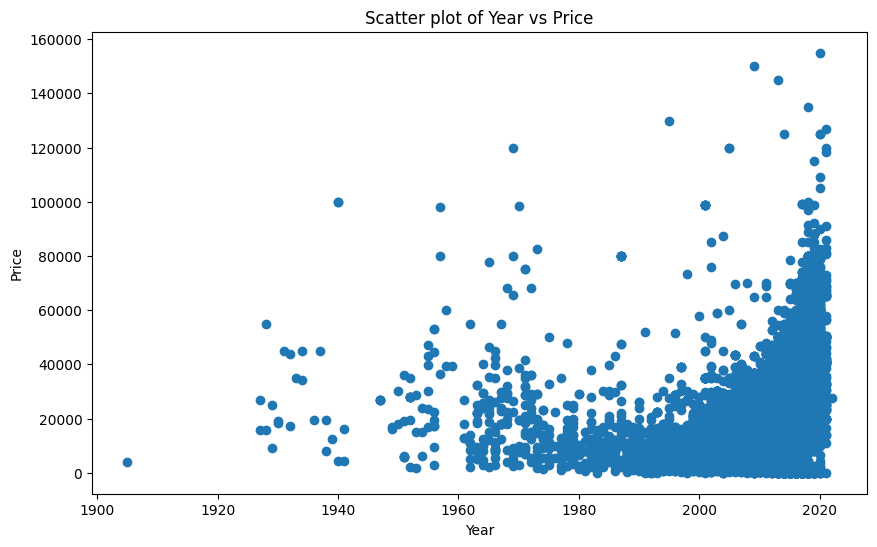

In [15]:
# Let's try some plots before Data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price')
plt.show()

In [287]:
cars.query('year < 1980 and title_status != "parts_only" and price > 20 and price < 100000')[['price','manufacturer','model','year']].sort_values('price')

,price,manufacturer,model,year
249753,21,buick,skylark,1968.0
61352,23,NaN,oldsmobile cutlass,1972.0
368239,30,chevrolet,corvette,1956.0
286595,30,NaN,willys,1923.0
381707,30,gmc,NaN,1937.0
...,...,...,...,...
42375,99500,lincoln,model l roadster,1929.0
53869,99888,ford,sedan,1940.0
60929,99888,ford,sedan,1940.0
60538,99900,chevrolet,corvette,1954.0


In [205]:
cars.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price       1.000000
year        0.347812
id         -0.076019
odometer   -0.177927
Name: price, dtype: float64

## Ok at this point, after exploration it's time to do some data cleaning.

In [37]:
# We initiallly decided to drop rows where 'manufacturer' and 'model' is NaN
cars = cars.dropna(subset=['model'])
cars = cars.dropna(subset=['manufacturer'])

# However we're going to drop all rows wiht NaN values as they may skew our correlation matix.
cars = cars.dropna()

# Let's clean up undesirable title status
remove_title_status = ['salvage', 'parts_only', 'lien', 'missing','rebuilt']
cars = cars[~cars['title_status'].isin(remove_title_status)]

# Let's remove entries that are parts only.
cars = cars[cars['title_status'] != 'parts_only']

# Let's drop older cars that may be less desirable to customers and could be priced lower than their market value. Also may require more maintenance, repairs, missing safety features, not as fuel efficient and cost money to store on the lot. Let's drop cars that over 30 years old.
#cars = cars[cars['year'] >= 1985]
cars = cars[cars['year'] >= 1975] 

# Price to keep on the lot. Let's drop cars that are priced less than $600, that's $50/month in expenses (at least) to keep and store on the lot. 
cars = cars[cars['price'] >= 600]

# Let's get rid of cars that are priced over $120,000, as they may be outliers and skewing the data. Also may not be desirable to customers and could be priced higher than their market value.
# Anything over $120,000 is likely a luxury or exotic car,which we can analyze separately if we want to.  
cars = cars[cars['price'] <= 120000]

# Let's drop recors there manufacturer is Harley-Davidson, as they are motorcycles.  The idea is that luxury cars, motorcyles, have different features and the dealership is specialized in these areas.
cars = cars[cars['manufacturer'] != 'harley-davidson']

# Let's drop cars that have an odometer reading over 250,000 miles, as they may be less desirable to customers and could be priced lower than their market value. After 250,000. It may be time to replace the motor.
cars = cars[cars['odometer'] <= 250000]

In [39]:
# Do we have any more null features?
# cars.isnull().sum()

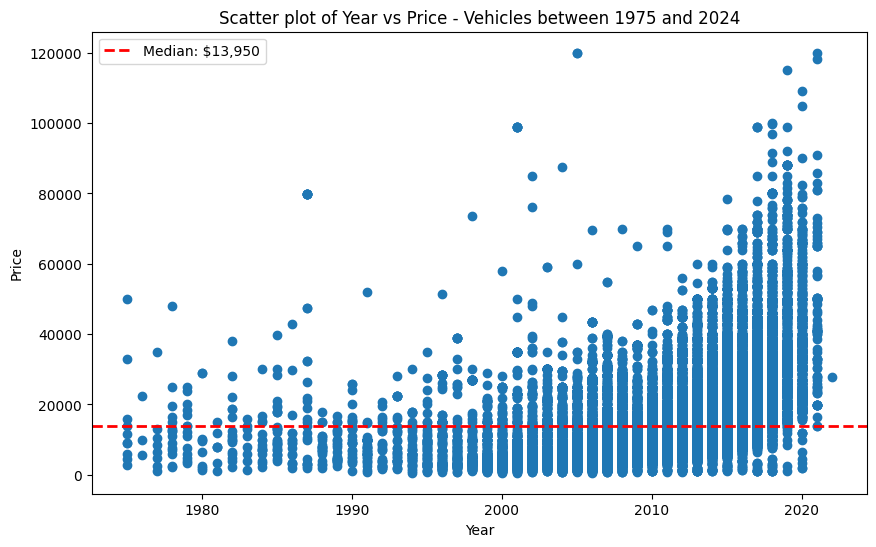

In [40]:
# Let's try to plot again after some data cleaning
#sns.scatterplot(data=cars, x='year', y='price')
median_price = cars['price'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['year'], cars['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter plot of Year vs Price - Vehicles between 1975 and 2024')
plt.axhline(y=median_price, color='red', linestyle='--', linewidth=2, label=f'Median: ${median_price:,.0f}')
plt.legend()
plt.savefig('../images/cleaned_year_price_1975_2024.png')
plt.show()

It seems to tail off in the 90s, so adjusting the year to 1995 and then replotting. Scrapping this idea and plotting median prices.

Ok let's look at price to mileage(odometer). 

In [41]:
# Let's check the odometer values of our current dataset
cars['odometer'].describe()
#cars.query('odometer > 250000')[['price','manufacturer','model','year','odometer']].sort_values('odometer')

count     29864.000000
mean     107899.237309
std       52845.594418
min           0.000000
25%       70821.750000
50%      107726.000000
75%      143000.000000
max      250000.000000
Name: odometer, dtype: float64

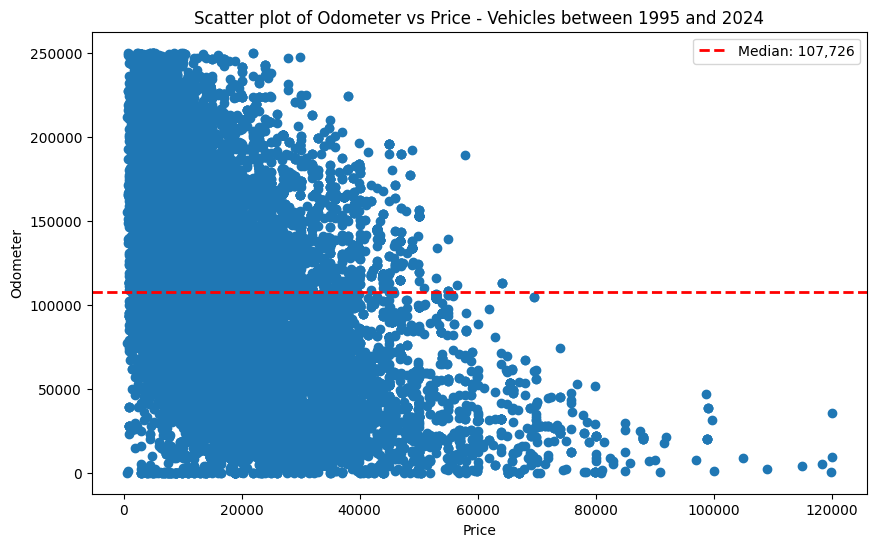

In [42]:
median_mileage = cars['odometer'].median()

plt.figure(figsize=(10,6))
plt.scatter(cars['price'], cars['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Scatter plot of Odometer vs Price - Vehicles between 1995 and 2024')
plt.axhline(y=median_mileage, color='red', linestyle='--', linewidth=2, label=f'Median: {median_mileage:,.0f}')
plt.legend()
plt.savefig('../images/odometer_price_scatter.png')
plt.show()

In [43]:
cars_numeric = cars.copy()
cars_numeric = cars_numeric[(cars_numeric['price'] != 0) & (cars_numeric['price'] != 1)]
cars_numeric = cars_numeric[(cars_numeric['price'] < 100000)]
cars_numeric['price'].value_counts().sort_values()  

bins = np.arange(0, cars_numeric['price'].max() + 5000, 5000)
cars_numeric['bins'] = pd.cut(cars_numeric['price'], bins=bins)

cars_numeric = cars_numeric[cars_numeric['cylinders'] != 'other']
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
title_status_mapping = {
    'clean': 5,
    'salvage': 4,
    'rebuilt': 3,
    'lien': 2,
    'missing': 1,
    'parts only': 0
}
size_mapping = {
    'full-size': 3,
    'mid-size': 2,
    'compact':  1,
    'sub-compact': 0
}
fuel_mapping = {
    'gas': 3,
    'diesel': 2,
    'electric': 1,
    'hybrid': 0
}
cylinders_mapping = {
    '12 cylinders': 6,
    '10 cylinders': 5,
    '8 cylinders': 4,
    '6 cylinders': 3,
    '5 cylinders': 2,
    '4 cylinders': 1,
    '3 cylinders': 0
}
drive_mapping = {
    '4wd': 2,
    'rwd': 1,
    'fwd': 0
}
cars_numeric['bin_index'] = cars_numeric.groupby('bins', observed=True).cumcount()+1

cars_numeric['condition'] = cars_numeric['condition'].map(condition_mapping)
cars_numeric['title_status'] = cars_numeric['title_status'].map(title_status_mapping)    
cars_numeric['size'] = cars_numeric['size'].map(size_mapping)
cars_numeric['fuel'] = cars_numeric['fuel'].map(fuel_mapping)
cars_numeric['cylinders'] = cars_numeric['cylinders'].map(cylinders_mapping)
cars_numeric['drive'] = cars_numeric['drive'].map(drive_mapping)
cars_numeric = cars_numeric.select_dtypes(include=np.number)

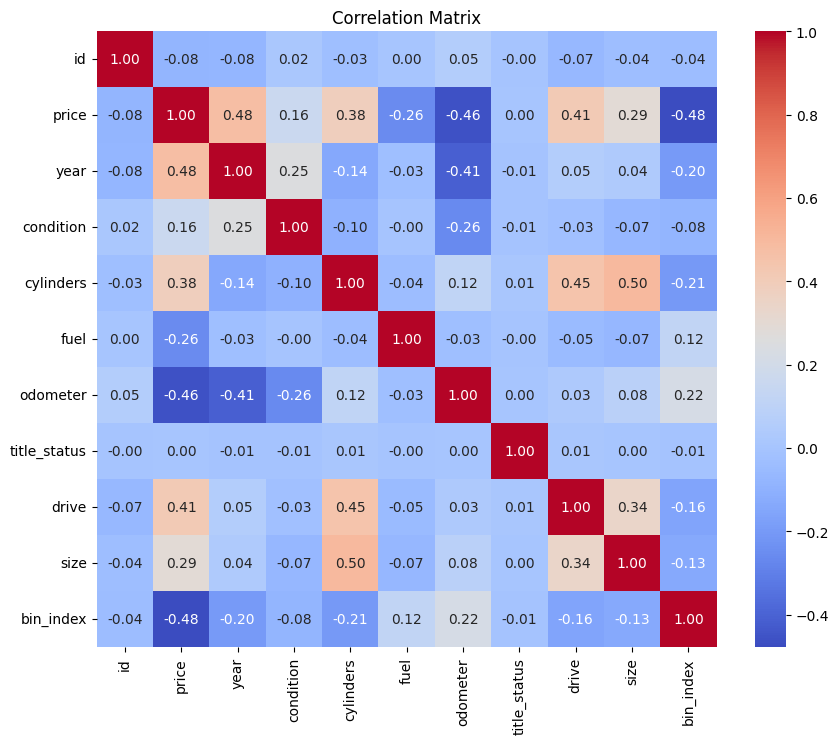

In [44]:
# Correlation matrix naive approach, via frequency encoding
corr = cars_numeric.corr()

    
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.savefig('../images/correlation_matrix_cleaned.png')
plt.show()

In [45]:
cars = cars[(cars['price'] != 0) & (cars['price'] != 1)]
cars = cars[(cars['price'] < 100000)]
cars['price'].value_counts().sort_values()  

bins = np.arange(0, cars['price'].max() + 5000, 5000)
cars['bins'] = pd.cut(cars['price'], bins=bins)
#cars.query('price > 0').plot(kind='scatter', x='year', y='price')

#cars.info()

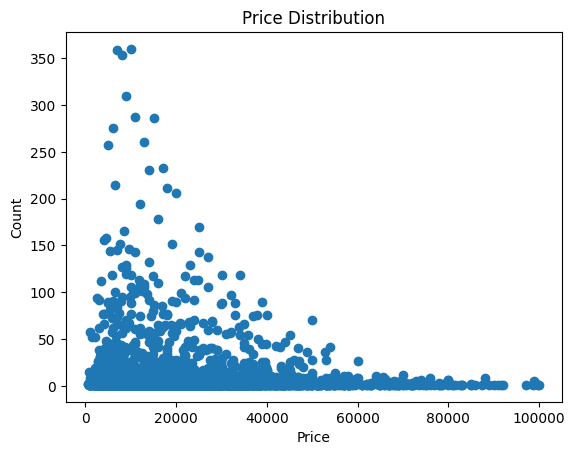

             id      region  price    year manufacturer       model  \
215  7316482063  birmingham   4000  2002.0       toyota        echo   
219  7316429417  birmingham   2500  1995.0          bmw        525i   
268  7315946365  birmingham   9000  2008.0        mazda  miata mx-5   
337  7315354216  birmingham   8950  2011.0         ford       f-150   
346  7315259946  birmingham  98900  2001.0      ferrari  360 modena   

     condition    cylinders fuel  odometer title_status transmission  \
215  excellent  4 cylinders  gas  155000.0        clean    automatic   
219       fair  6 cylinders  gas  110661.0        clean    automatic   
268  excellent  4 cylinders  gas   56700.0        clean    automatic   
337  excellent  6 cylinders  gas  164000.0        clean    automatic   
346       good  8 cylinders  gas   20187.0        clean    automatic   

                   VIN drive       size         type paint_color state  \
215  JTDBT123520243495   fwd    compact        sedan        blue  

In [46]:
plt.Figure(figsize=(10, 8))
price_counts = cars['price'].value_counts().sort_values()
#price_counts = cars['bins'].value_counts().sort_values()
plt.scatter(price_counts.index, price_counts.values)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()
print(cars.head())
print(type(cars['bins']))


In [47]:
# Let's use one hot encoding
keep_cars = cars[['price','year','odometer']]
categorical_cols=['condition', 'size', 'drive']

# get everything else and concat
cars_encoded = pd.concat([keep_cars, pd.get_dummies(cars[categorical_cols], dtype=int)], axis=1)

cars_encoded.info()

# maybe do another one with transmission and cyliners.



<class 'pandas.core.frame.DataFrame'>
Index: 29857 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                29857 non-null  int64  
 1   year                 29857 non-null  float64
 2   odometer             29857 non-null  float64
 3   condition_excellent  29857 non-null  int64  
 4   condition_fair       29857 non-null  int64  
 5   condition_good       29857 non-null  int64  
 6   condition_like new   29857 non-null  int64  
 7   condition_new        29857 non-null  int64  
 8   condition_salvage    29857 non-null  int64  
 9   size_compact         29857 non-null  int64  
 10  size_full-size       29857 non-null  int64  
 11  size_mid-size        29857 non-null  int64  
 12  size_sub-compact     29857 non-null  int64  
 13  drive_4wd            29857 non-null  int64  
 14  drive_fwd            29857 non-null  int64  
 15  drive_rwd            29857 non-null  i

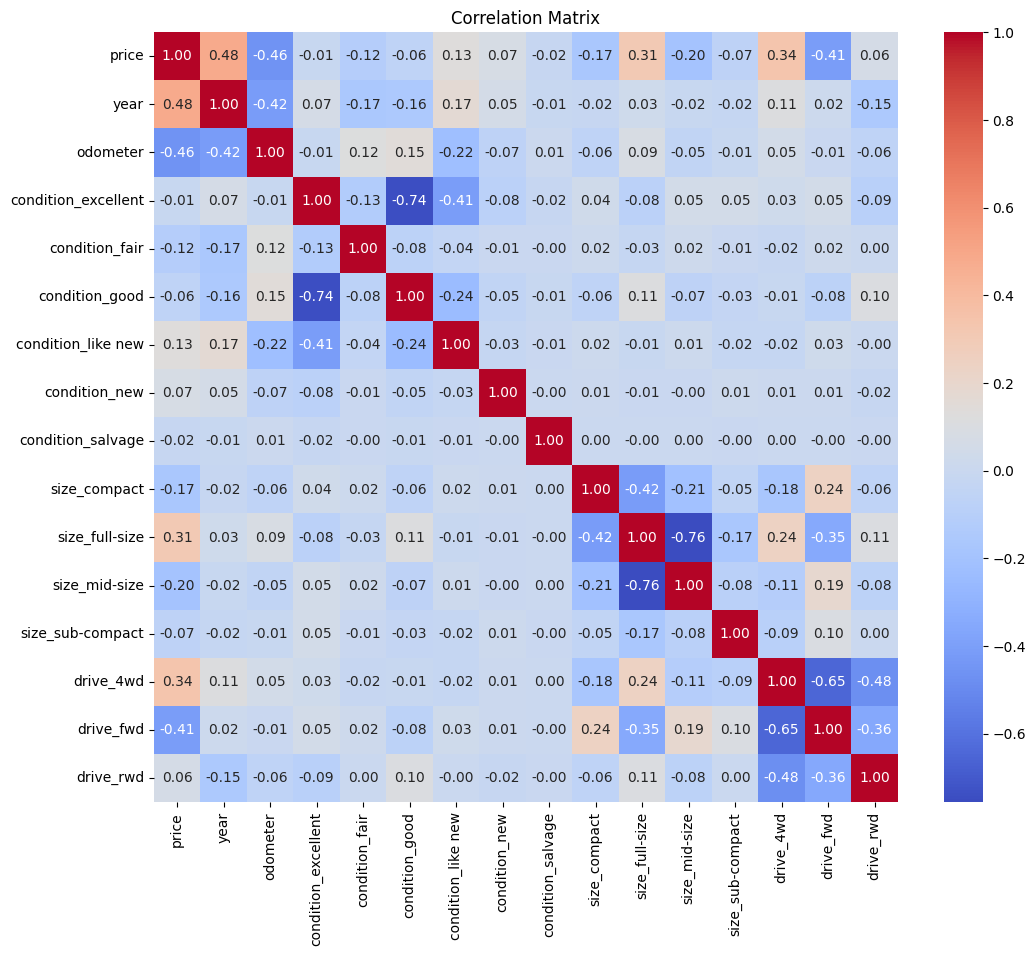

In [49]:
# Correlation matrix 
corr = cars_encoded.corr()

    
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.savefig('../images/correlation_matrix_ohe.png')
plt.show()

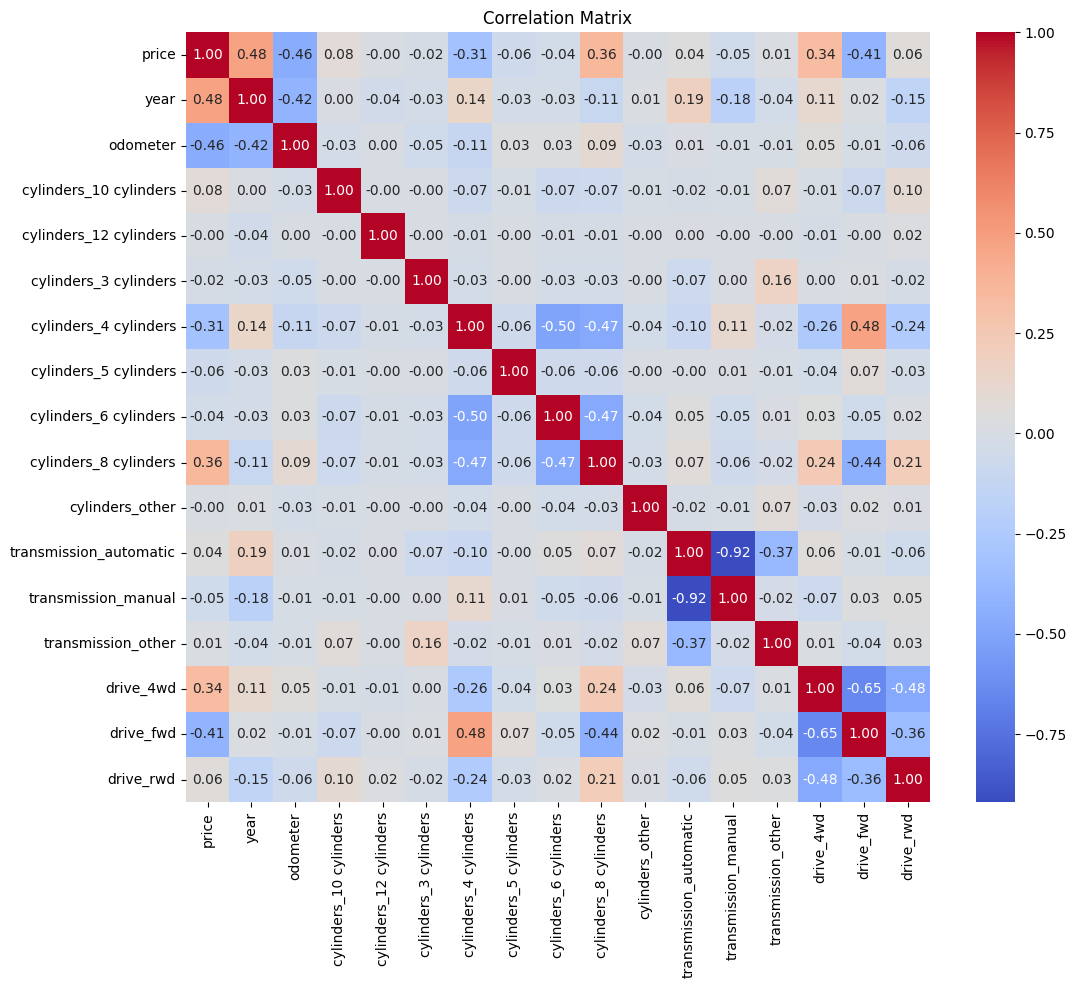

In [50]:
# Let's use one hot encoding
keep_cars = cars[['price','year','odometer']]
categorical_cols=['cylinders', 'transmission','drive']

# get everything else and concat
cars_encoded = pd.concat([keep_cars, pd.get_dummies(cars[categorical_cols], dtype=int)], axis=1)

# Correlation matrix naive approach
corr = cars_encoded.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, fmt=".2f", cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.savefig('../images/correlation_matrix_ohe.png')
plt.show()

In [53]:
# Let's take another look at cylinders, 8 cylinders...to be exact
cars['cylinders'].value_counts()

cylinders
6 cylinders     9958
4 cylinders     9949
8 cylinders     9233
10 cylinders     322
5 cylinders      246
other             80
3 cylinders       58
12 cylinders      11
Name: count, dtype: int64

In [54]:
# Let's also take another look at transmission, 4wd...to be exact
cars['drive'].value_counts()

drive
4wd    13847
fwd     9786
rwd     6224
Name: count, dtype: int64

In [26]:
cars.query('transmission == "other"').head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al


Between these corrolation matrixes there's not much more.  Popular used cars are 8 cylinder vehicles (SUVs), usually automatic or other. 

In [219]:
cars['paint_color'].value_counts()

paint_color
white     72404
black     58206
silver    39870
blue      29334
red       28741
grey      22679
green      7039
custom     6389
brown      6175
yellow     2011
orange     1843
purple      674
Name: count, dtype: int64

In [218]:
cars.query('title_status == "parts only"').sort_values('price')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,bins
169822,7307295335,wichita,5,2008.0,dodge,durango,salvage,NaN,gas,180000.0,parts only,automatic,NaN,NaN,NaN,NaN,NaN,ks,"(0, 5000]"
301684,7315185027,toledo,10,2021.0,NaN,any and all,NaN,NaN,other,10.0,parts only,other,NaN,NaN,NaN,NaN,NaN,oh,"(0, 5000]"
199941,7302569334,flint,25,2021.0,NaN,0,good,other,other,240000.0,parts only,other,NaN,rwd,full-size,SUV,blue,mi,"(0, 5000]"
183832,7303577359,baltimore,100,1901.0,NaN,rolls royce phantom,NaN,NaN,electric,1000.0,parts only,manual,NaN,NaN,NaN,NaN,NaN,md,"(0, 5000]"
156789,7314968063,des moines,100,2008.0,chevrolet,trailblazer,NaN,NaN,other,111111.0,parts only,other,NaN,NaN,NaN,NaN,NaN,ia,"(0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24499,7309935529,chico,18000,1999.0,NaN,am general humvee,fair,8 cylinders,diesel,26000.0,parts only,automatic,NaN,4wd,NaN,NaN,NaN,ca,"(15000, 20000]"
292684,7314612930,cleveland,20000,1999.0,NaN,Rolls Royce Silver Seraph,good,12 cylinders,gas,30194.0,parts only,automatic,SCALA61E9XCX02227,rwd,full-size,sedan,blue,oh,"(15000, 20000]"
61328,7316601012,SF bay area,27000,2017.0,mercedes-benz,c300,excellent,4 cylinders,gas,53000.0,parts only,automatic,NaN,rwd,NaN,NaN,white,ca,"(25000, 30000]"
116840,7316291472,tampa bay area,32500,1932.0,ford,roadster,new,8 cylinders,gas,50.0,parts only,manual,NaN,fwd,mid-size,coupe,silver,fl,"(30000, 35000]"


In [186]:
price_dist = cars['bins'].value_counts().sort_index()
print(price_dist)

bins
(0, 5000]          62334
(5000, 10000]      79057
(10000, 15000]     53711
(15000, 20000]     48580
(20000, 25000]     34841
(25000, 30000]     34716
(30000, 35000]     26585
(35000, 40000]     23206
(40000, 45000]      9547
(45000, 50000]      6521
(50000, 55000]      3795
(55000, 60000]      2875
(60000, 65000]      1603
(65000, 70000]      1528
(70000, 75000]       838
(75000, 80000]       670
(80000, 85000]       395
(85000, 90000]       290
(90000, 95000]       127
(95000, 100000]      118
Name: count, dtype: int64


In [ ]:
bin_map = {pd.Interval(left=0, right=5000, closed='right'): 2500,

In [25]:
cars['condition'].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [8]:
# lets see what the transmission column looks like
cars.query('transmission == "other"')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [73]:
cars['price'].value_counts().sort_values()

price
17873        1
26873        1
15375        1
27109        1
17868        1
         ...  
8995      2837
9995      2867
7995      3129
6995      3169
0        32895
Name: count, Length: 15655, dtype: int64

In [10]:
cars['size'].value_counts()

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64

In [51]:
cars['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

In [6]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [402]:
cars['year'].isna().sum()
#cars['year'].isnull().sum()

cars['fuel'].value_counts()

#cars['year'] = cars['year'].dropna().astype(int)
#cars.plot(kind='scatter', x=cars['year'], y=cars['price'])

fuel
gas         280213
other        25577
diesel       19572
hybrid        4480
electric      1488
Name: count, dtype: int64